In [1]:
from cloudvolume import CloudVolume
import numpy as np

seg0 = CloudVolume("s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg", use_https=True, parallel=True, mip=(8,8,40))
seg1 = CloudVolume("s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg", use_https=True, parallel=True, mip=(16,16,40))
seg2 = CloudVolume("s3://bossdb-open-data/iarpa_microns/minnie/minnie65/seg", use_https=True, parallel=True, mip=(32,32,40))


In [2]:
endpoint = (107820, 233757, 21960)
import numpy as np
def get_bounds(endpoint, radius, mult=1):
    bound  = (endpoint[0] - int(mult*radius[0]), 
            endpoint[0] + int(mult*radius[0]),
            endpoint[1] - int(mult*radius[1]),
            endpoint[1] + int(mult*radius[1]),
            endpoint[2] - radius[2],
            endpoint[2] + radius[2])
    return bound
b0 = get_bounds(np.divide(endpoint, np.array([2,2,1])), (100,100,10))
b1 = get_bounds(np.divide(endpoint, np.array([4,4,1])), (50,50,10))
b2 = get_bounds(np.divide(endpoint, np.array([8,8,1])), (25,25,10))
s0 = seg0[b0[0]:b0[1], b0[2]:b0[3], b0[4]:b0[5]]
s1 = seg1[b1[0]:b1[1], b1[2]:b1[3], b1[4]:b1[5]]
s2 = seg2[b2[0]:b2[1], b2[2]:b2[3], b2[4]:b2[5]]
s0 = np.squeeze(s0)
s0_1 = np.array([s0==864691133497316692])


SyntaxError: invalid syntax (130164044.py, line 18)

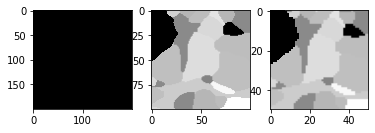

In [75]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,3)
s0_slice = s0_1[0, :, :, 1]
s1_slice = s1[:, :, 1]
s2_slice = s2[:, :, 1]

ax[0].imshow(s0_slice, cmap='gray')
ax[1].imshow(s1_slice, cmap='gray', vmin=np.min(s1_slice[s1_slice > 0]))
ax[2].imshow(s2_slice, cmap='gray', vmin=np.min(s2_slice[s2_slice > 0]))
plt.show()

In [73]:
s0_1[0,:,:,9]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [71]:
s0_1.shape

(1, 200, 200, 20)